In [9]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base = pd.read_csv('OnlineNewsPopularity-Liduvina.csv')

In [3]:
training, test = train_test_split(base, train_size=0.75)

In [4]:
Xp = training.iloc[:, 2:60]
Y = training.iloc[:, 61:62]
X_t = test.iloc[:, 2:60]
Y_t = test.iloc[:, 61:62]

In [5]:
clf = ExtraTreesClassifier()
clf = clf.fit(Xp, Y)
model = SelectFromModel(clf, prefit=True)
X = model.transform(Xp)
X_t = model.transform(X_t)

C:\Users\M\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [6]:
clf = KNeighborsClassifier()
clf.fit(X, Y)
clf.score(X_t, Y_t)

C:\Users\M\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.27938654020784986

C:\Users\M\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\M\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\M\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\M\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\M\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when

Máximo acierto con k = 200


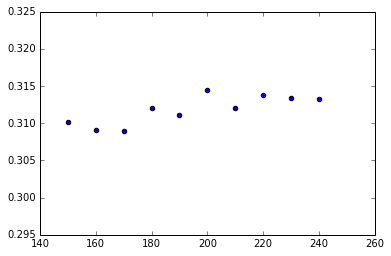

In [7]:
posibles_k = np.arange(150, 250, 10)
accuracy = []
for k in posibles_k:
    clf = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    clf.fit(X,Y)
    score = clf.score(X_t, Y_t)
    accuracy.append(score)
    
plt.scatter(posibles_k, accuracy)

# Encontrar el k máximo con esta prueba
index = accuracy.index(max(accuracy))
k_max = posibles_k[index]
print 'Máximo acierto con k =', k_max

In [10]:
clf = SVC()
clf.fit(X, Y)
print clf.score(X_t, Y_t)

C:\Users\M\Anaconda2\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


0.288265563515
